# Modelling of electric power system (transmission or distribution)
In this example, the grid model is provided in the CIM CGMES (v2.4.15) format. Active and reactive power flows and voltages are calculated using the pandapower package, which is one of the most commonly used packages for power flow calculations in Python. The cim2pp function is used to convert the input data to a format suitable for pandapower. Please see https://github.com/e2nIEE/pandapower/blob/develop/tutorials/cim2pp.ipynb.

Importing packages:

In [1]:
import os
import pandas as pd
import pandapower as pp
from pandapower.converter import from_cim as cim2pp

Define the location of input data:

In [2]:
folder_path = os.path.join(os.getcwd(), 'example_cim')

Define the list of zip files with input data organized in xml files:

In [3]:
cgmes_files = [os.path.join(folder_path, 'CGMES_v2.4.15_SmallGridTestConfiguration_Boundary_v3.0.0.zip'),
                os.path.join(folder_path, 'CGMES_v2.4.15_SmallGridTestConfiguration_BaseCase_Complete_v3.0.0.zip')]

Check if the files are available:

In [4]:
for f in cgmes_files:
    if not os.path.exists(f):
        raise UserWarning(f"Wrong path specified for the CGMES file {f}")

Turn off the warnings or use the last version of pandas:

In [5]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

Conversion of CIM to pandapower format:

In [6]:
net = cim2pp.from_cim(file_list=cgmes_files, use_GL_or_DL_profile='DL')

The input data required for the power flow calculation include at least:
- network topology defined by lines and transformers that are connecting buses (from_bus, to_bus),
- resistance, reactance and susceptance of power lines,
- resistance, reactance and tap ratio of transformers,
- transmission capacities of lines and transformers,
- bus production and/or consumption of active and reactive power,
- bus voltages (magnitude and angle),
- type of buses (generator or PV bus, load or PQ bus, slack bus),
- some other data required for additional calculations such as economic dispatch and unit commitment.

For all buses also the geo data can be provided even though they are not needed for the power flow calculation.

Power flow calculation using pandapower:

In [7]:
pp.runpp(net)

The first set of the results consists of:
- nodal voltages (magnitude in p.u. in 'vm_pu' and phase angle in degrees in 'va_degree'),
- generation of active power in MW and reactive power in MVAr (positive value of 'p_mw' and 'q_mvar'),
- consumption of active power in MW and reactive power in MVAr (negative value of 'p_mw' and 'q_mvar'),
provided in 'net.res_bus'.

The second set of the results is stored in 'net.res_line' and consists of active power flows in MW and reactive power flows in MVAr on the lines and transformers. For each line and transformer the values are provided at both ends ('p_from_mw', 'q_from_mvar' and 'p_to_mw', 'q_to_mvar').

In 'net.res_line', also some other parameters are stored, for example the loading percent in 'loading_percent', where 100 % presents the overloading of the element.

The results are presented as:

In [8]:
print(net.res_bus.iloc[0:5]) # print first few bus results
print(net.res_line.iloc[0:5]) # print first few line results

      vm_pu  va_degree   p_mw     q_mvar
0  0.974052 -18.213450   39.0  10.000000
1  1.050000  -1.952397 -220.0 -38.767059
2  0.945710  -8.057535   33.0  15.000000
3  0.973778 -18.504162   20.0   9.000000
4  0.966486 -18.585519   90.0  30.000000
   p_from_mw  q_from_mvar    p_to_mw  q_to_mvar     pl_mw   ql_mvar  \
0  -9.894135    -7.475764   9.914236   2.208162  0.020101 -5.267602   
1  94.197536     6.042673 -91.378024  -7.241263  2.819513 -1.198591   
2  62.521570     9.162733 -61.331493 -16.059573  1.190077 -6.896840   
3  43.726711    12.592039 -42.611019 -13.184983  1.115693 -0.592944   
4  66.802896    20.438213 -64.509872 -17.369313  2.293024  3.068900   

   i_from_ka   i_to_ka      i_ka  vm_from_pu  va_from_degree  vm_to_pu  \
0   0.054896  0.044773  0.054896    0.988039       -2.748280  0.992257   
1   0.410039  0.413718  0.413718    1.006865       -8.936877  0.969086   
2   0.267036  0.276314  0.276314    1.035000        0.000000  1.003566   
3   0.197056  0.202114  0.20211

If the geo data is available, the network topology with some results can be presented as:

In [9]:
bus_geo = net.bus_geodata['coords']
net.bus_geodata.fillna(bus_geo, inplace=True)

<Axes: >

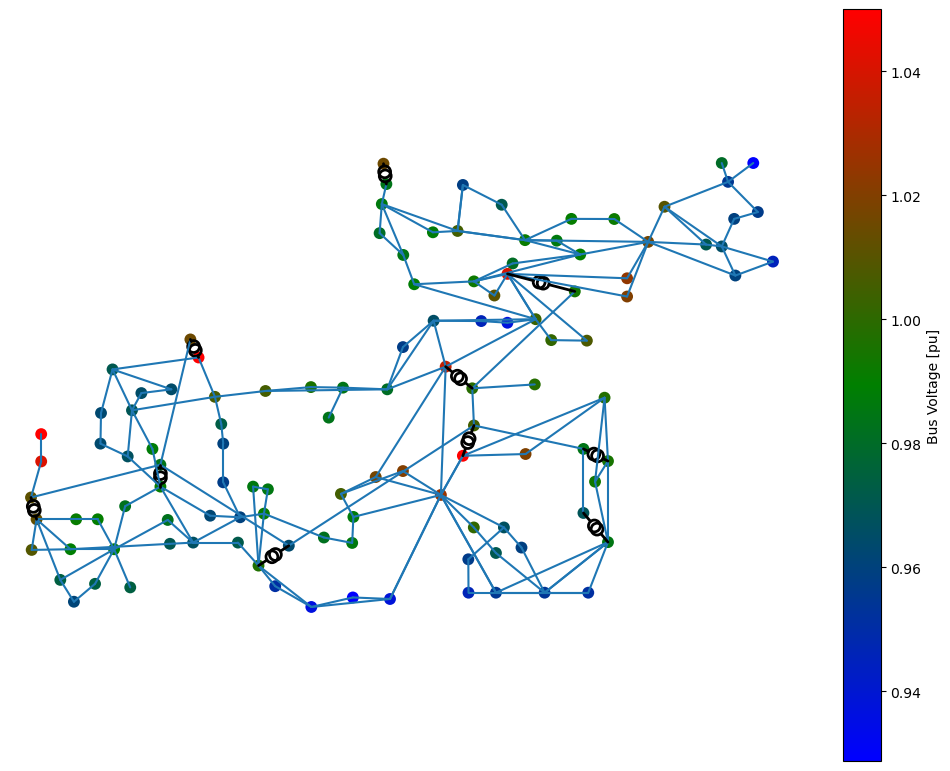

In [10]:
import pandapower.plotting as plt
import pandapower.plotting.colormaps as cmaps
cmap_list = [(0.9, "blue"), (1.0, "green"), (1.1, "red")]
cmap, norm = cmaps.cmap_continuous(cmap_list)
sizes = plt.get_collection_sizes(net)
bc = plt.create_bus_collection(net,net.bus.index.values,cmap=cmap, size=sizes['bus'])
lc = plt.create_line_collection(net,net.line.index.values, use_bus_geodata=True)
tc = plt.create_trafo_collection(net,net.trafo.index.values, size=sizes["trafo"])
plt.draw_collections([bc,lc,tc])

This figure presents the network topology with the bus voltages (magnitude in p.u.).